# Segmentation can be done in a manner that is agnostic of space

In [2]:
import skimage.filters as filt

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import nibabel as nib
T1w_img = nib.load('991267-T1w_acpc_dc.nii.gz')
T1w_data = T1w_img.get_data()

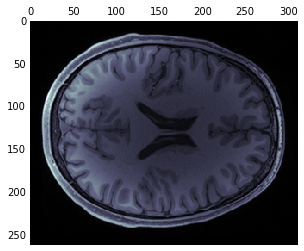

In [14]:
plt.matshow(T1w_data[:, :, T1w_data.shape[-1]//2], cmap='bone')

In [7]:
hist, bin_centers = np.histogram(T1w_data.ravel(), nbins)
hist = hist.astype(float)

# class probabilities for all possible thresholds
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]

# # class means for all possible thresholds
mean1 = np.cumsum(hist * bin_centers) / weight1
mean2 = (np.cumsum((hist * bin_centers)[::-1]) / weight2[::-1])[::-1]

# Clip ends to align class 1 and class 2 variables:
# The last value of `weight1`/`mean1` should pair with zero values in
# `weight2`/`mean2`, which do not exist.
variance12 = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

idx = np.argmax(variance12)
threshold = bin_centers[:-1][idx]



NameError: name 'nbins' is not defined

In [8]:
thresh = filt.threshold_otsu(T1w_data)

In [9]:
binary = T1w_data >= thresh

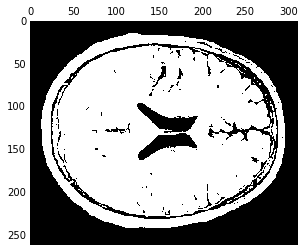

In [10]:
plt.matshow(binary[:, :, binary.shape[-1]//2], cmap='bone')

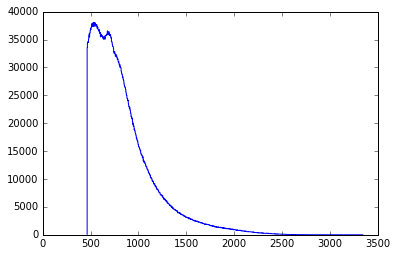

In [13]:
foo = plt.hist(T1w_data[T1w_data >= thresh], bins=1000, histtype='step')